In [1]:
from chunk_classifier import *
from chunker import *
from quarter_classifier import *

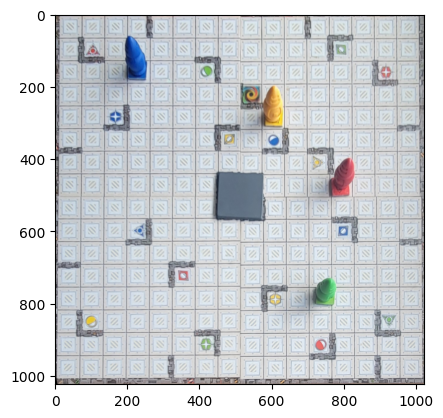

In [51]:
imgs_path = list((DATA_PATH / "input").glob("*.jpg"))
img = cv2.imread(str(np.random.choice(imgs_path, 1)[0]))
chunks, projected = get_chunks(img, return_projected=True)
plt.imshow(projected[:, :, ::-1])

In [52]:
proba = predict(chunks)
proba = proba.reshape((16, 16, 4))
quarters = resample(proba, 8)
qlabels = []
rot = [0, 1, 3, 2]

3


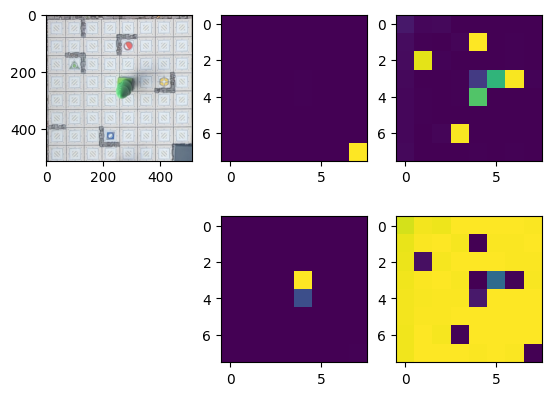

In [53]:
i = np.random.randint(4)
print(i)
quarter = np.rot90(quarters[i, :, :, :], rot[i])
plt.subplot(232)
plt.imshow(quarter[:, :, 0])
plt.subplot(233)
plt.imshow(quarter[:, :, 1])
plt.subplot(235)
plt.imshow(quarter[:, :, 2])
plt.subplot(236)
plt.imshow(quarter[:, :, 3])

plt.subplot(231)
plt.imshow(np.rot90(resample(projected, 512)[i], rot[i])[:, :, ::-1])

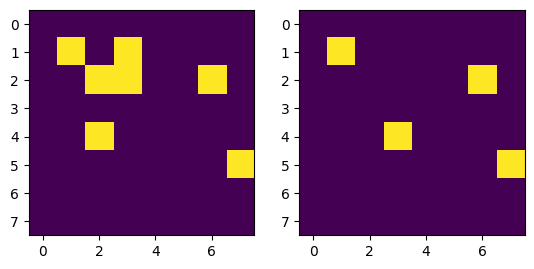

In [41]:
model = MODELS[0]
solution = np.zeros((8, 8), dtype=bool)
x, y = zip(*model)
solution[x, y] = True
plt.subplot(121)
plt.imshow(prediction)
plt.subplot(122)
plt.imshow(solution)